# Data imports

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics, tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Abbreviations 

m = mathematics dataset
p = Portuguese dataset
dtr = Decision tree regressor
lin = Linear regression
SKB = SelectKBest
fi = Feature importance
RMSE = Root mean square error

# Data read

In [35]:
# Define column names
columns=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid',
                                    'activities','nursery','higher','internet','romantic','famrel','freetime','goout',
                                    'Dalc','Walc','health','absences','G1','G2','G3']

# student_mat students in mathematics
student_math = pd.read_csv('student-mat.csv',sep=';',header=0, names=columns)

# student_por students in portuguese
student_port = pd.read_csv('student-por.csv',sep=';',header=0, names=columns)

student_math.head(10)


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

# Encoding the data

In [36]:
columns_categorical = ['school','sex','address','famsize',
                       'Pstatus','Mjob','Fjob','reason', 'guardian', 'schoolsup', 
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
columns_numerical = ['age','Medu','Fedu','traveltime','studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc','health', 'absences','G1','G2', 'G3']
student_math_encoded = pd.DataFrame()
student_port_encoded = pd.DataFrame()

for col in columns_categorical:
  LE = LabelEncoder()
  dt_mat = LE.fit_transform(student_math[col])
  student_math_encoded[col] = dt_mat
  dt_por = LE.fit_transform(student_port[col])
  student_port_encoded[col] = dt_por

# combine with the numerical columns
for col in columns_numerical:
  student_math_encoded[col] = student_math[col]
  student_port_encoded[col] = student_port[col]


# Histogram for Math final grade (G3)

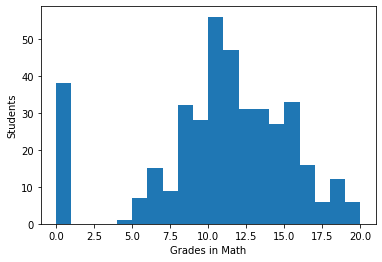

In [37]:
# Histogram showing Math final grade distribution

plt.hist(student_math['G3'],bins=20)
plt.xlabel('Grades in Math')
plt.ylabel('Students')
plt.show()

# Histogram for Portuguese final grade (G3)

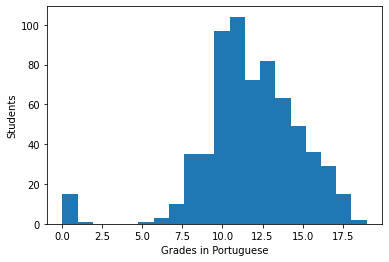

In [38]:
# Histogram showing Portuguese final grade distribution

plt.hist(student_port['G3'],bins=20)
plt.xlabel('Grades in Portuguese')
plt.ylabel('Students')
plt.show()

# Pearson Correlation Matrix for Math dataset

In [39]:
corr = student_math_encoded.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

# Normalizing and applying a jitter to the Math dataset

In [40]:
# Jitter function
def jitterMath(x):
    randomvecs = np.random.normal(0,0.1,[395,1])
    return x + randomvecs

#Normalize
m_norm_data = preprocessing.normalize(student_math_encoded)

m_jitter_data = jitterMath(m_norm_data)
m_norm_jitter = pd.DataFrame(m_jitter_data,columns=student_math.columns)
m_norm_jitter.head()

school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.111219 -0.111219 -0.069334 -0.111219 -0.111219 -0.111219  0.056322   
1 -0.258117 -0.258117 -0.211542 -0.258117 -0.211542 -0.258117 -0.164967   
2 -0.133550 -0.133550 -0.093453 -0.093453 -0.093453 -0.133550 -0.053357   
3  0.023016  0.023016  0.055124  0.023016  0.055124  0.055124  0.119340   
4  0.122045  0.122045  0.162701  0.122045  0.162701  0.203357  0.203357   

       Fedu      Mjob      Fjob  ...    famrel  freetime     goout      Dalc  \
0 -0.111219 -0.069334 -0.069334  ...  0.056322  0.014437  0.056322 -0.069334   
1 -0.258117 -0.258117 -0.258117  ... -0.025243 -0.118393 -0.118393 -0.211542   
2 -0.053357 -0.093453 -0.093453  ...  0.026836 -0.013260 -0.053357 -0.053357   
3  0.055124  0.055124  0.023016  ...  0.119340  0.087232  0.087232  0.055124   
4  0.162701  0.122045  0.122045  ...  0.284668  0.244013  0.203357  0.162701   

       Walc    health  absences        G1        G2        G3  
0 -0.069334  0.014437  0.140093  0.098208  0.140093  0.140093  
1 -0.211542 -0.118393 -0.071818 -0.025243 -0.025243  0.021331  
2 -0.013260 -0.013260  0.267414  0.147125  0.187221  0.267414  
3  0.055124  0.183557  0.087232  0.504637  0.472529  0.504637  
4  0.203357  0.325324  0.284668  0.365980  0.528603  0.528603  

[5 rows x 33 columns]

# Scatter matrix for Math dataset

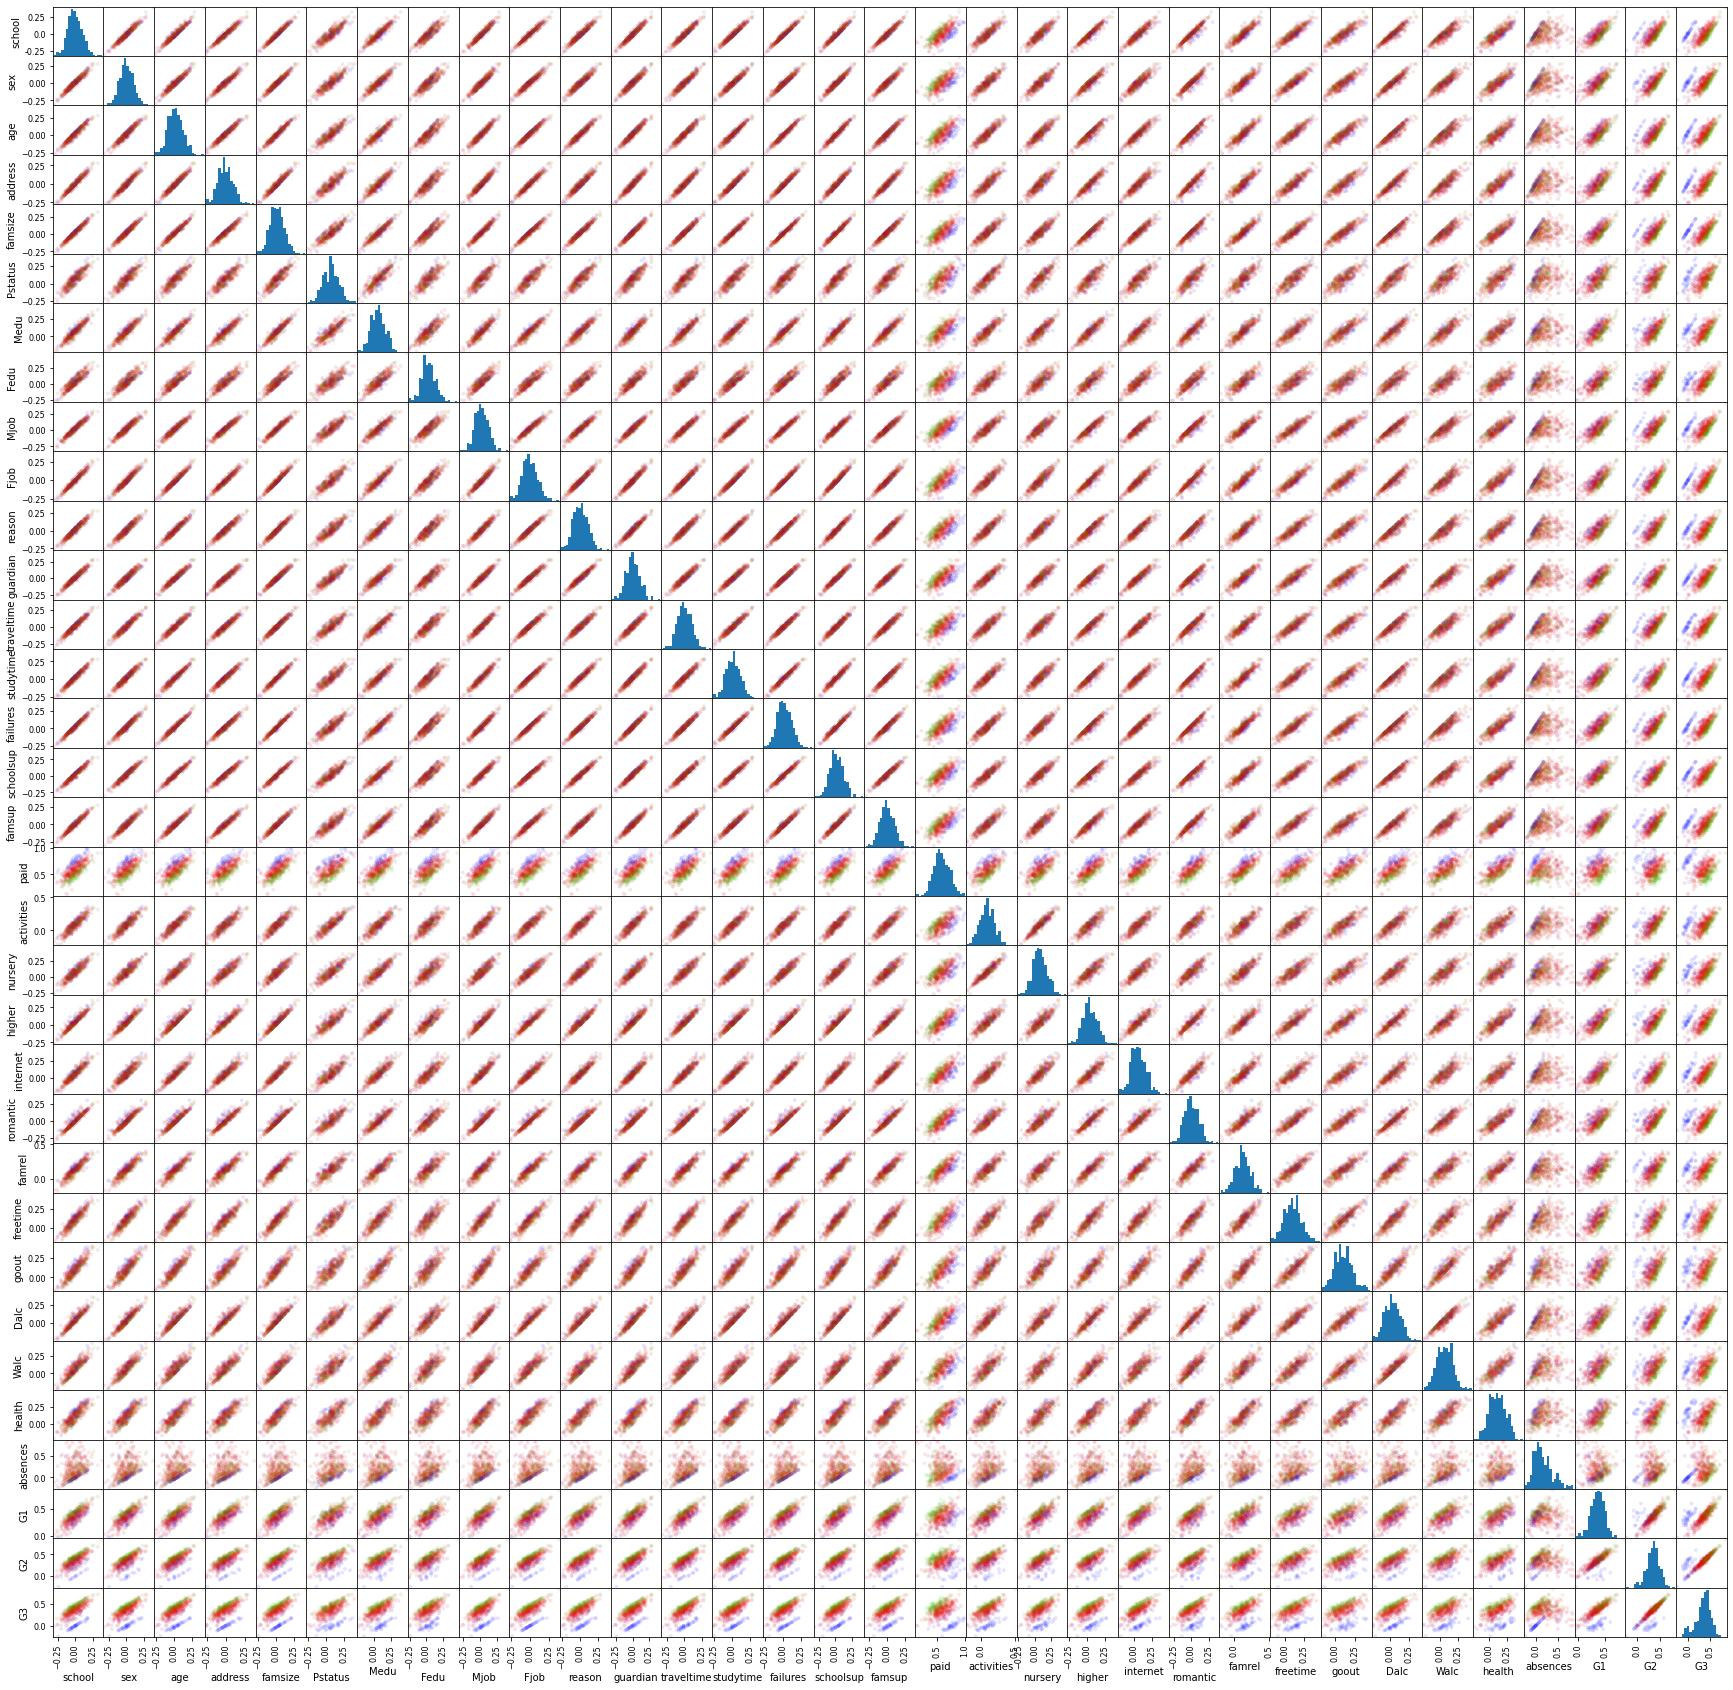

In [41]:
# Create a scatter matrix for the math dataframe, color by final grade G3 (Y_math)
Y_math = student_math['G3'] # Ska den vara normaliserad också?

pd.plotting.scatter_matrix(m_norm_jitter, c=Y_math, figsize=(30, 30),
                           marker='.', hist_kwds={'bins': 20}, s=60,
                           alpha=.1, cmap=plt.cm.brg)
plt.show()

# Pearson Correlation Matrix for the Portuguese dataset

In [42]:
corr = student_port_encoded.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)


# Normalizing and applying a jitter to the Portuguese dataset

In [43]:
# Jitter function for portugese data
def jitterPort(x):
    randomvecs = np.random.normal(0,0.1,[649,1])
    return x + randomvecs

#Normalize
p_norm_data = preprocessing.normalize(student_port_encoded)

p_jitter_data = jitterPort(p_norm_data)
p_norm_jitter = pd.DataFrame(p_jitter_data, columns=student_port.columns)
p_norm_jitter.head()


school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.000714 -0.000714  0.037218 -0.000714 -0.000714 -0.000714  0.151015   
1 -0.022120 -0.022120  0.016060 -0.022120  0.016060 -0.022120  0.054240   
2 -0.155809 -0.155809 -0.120275 -0.120275 -0.120275 -0.155809 -0.084742   
3 -0.230981 -0.230981 -0.197777 -0.230981 -0.197777 -0.197777 -0.131368   
4 -0.149858 -0.149858 -0.114743 -0.149858 -0.114743 -0.079628 -0.079628   

       Fedu      Mjob      Fjob  ...    famrel  freetime     goout      Dalc  \
0 -0.000714  0.037218  0.037218  ...  0.151015  0.113083  0.151015  0.037218   
1 -0.022120 -0.022120 -0.022120  ...  0.168781  0.092420  0.092420  0.016060   
2 -0.084742 -0.120275 -0.120275  ... -0.013675 -0.049208 -0.084742 -0.084742   
3 -0.197777 -0.197777 -0.230981  ... -0.131368 -0.164572 -0.164572 -0.197777   
4 -0.114743 -0.149858 -0.149858  ... -0.009399 -0.044513 -0.079628 -0.114743   

       Walc    health  absences        G1        G2        G3  
0  0.037218  0.113083  0.151015 -0.000714  0.416540  0.416540  
1  0.016060  0.092420  0.054240  0.321502  0.397862  0.397862  
2 -0.049208 -0.049208  0.057392  0.270593  0.306126  0.270593  
3 -0.197777 -0.064959 -0.230981  0.233881  0.233881  0.233881  
4 -0.079628  0.025716 -0.149858  0.236405  0.306634  0.306634  

[5 rows x 33 columns]

# Scatter matrix for Portugese dataset

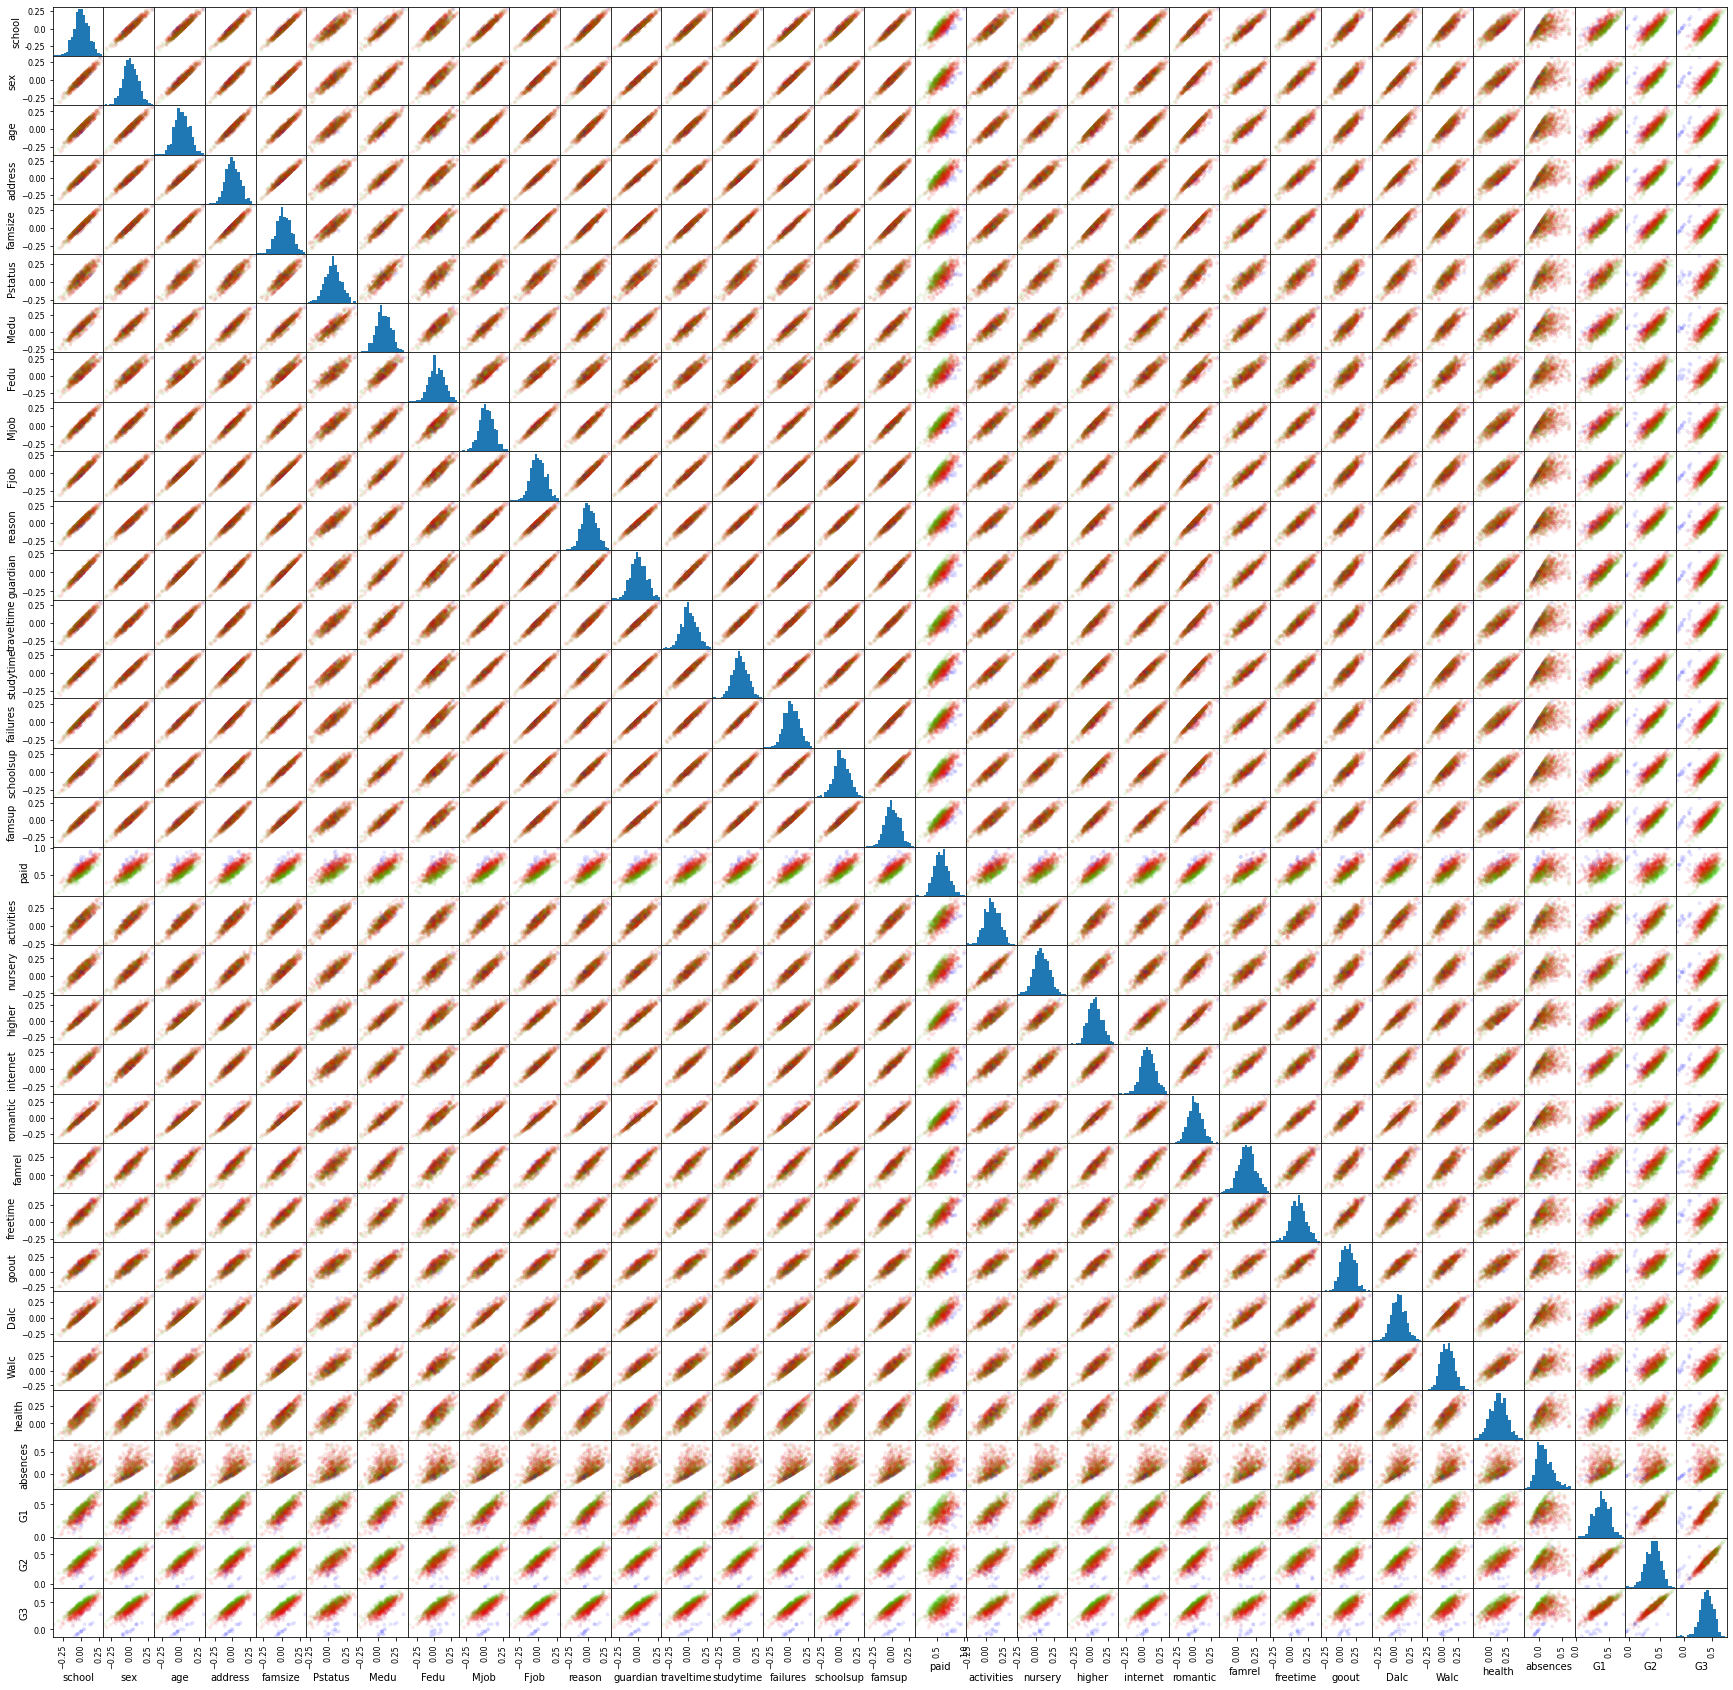

In [44]:
# Create a scatter matrix for the portugese dataframe, color by final grade G3 (Y_port)

Y_port = student_port['G3']
pd.plotting.scatter_matrix(p_norm_jitter, c=Y_port, figsize=(30, 30),
                           marker='.', hist_kwds={'bins': 20}, s=60,
                           alpha=.1, cmap=plt.cm.brg)
plt.show()

# Feature selection for Math dataset using feature_importances_

   Feature_names  Importances
31            G2     0.758287
29      absences     0.133293
17           age     0.023074
7         reason     0.020962
23        famrel     0.012699
21     studytime     0.011860
6           Fjob     0.007019
13       nursery     0.005890
28        health     0.005404
30            G1     0.004218


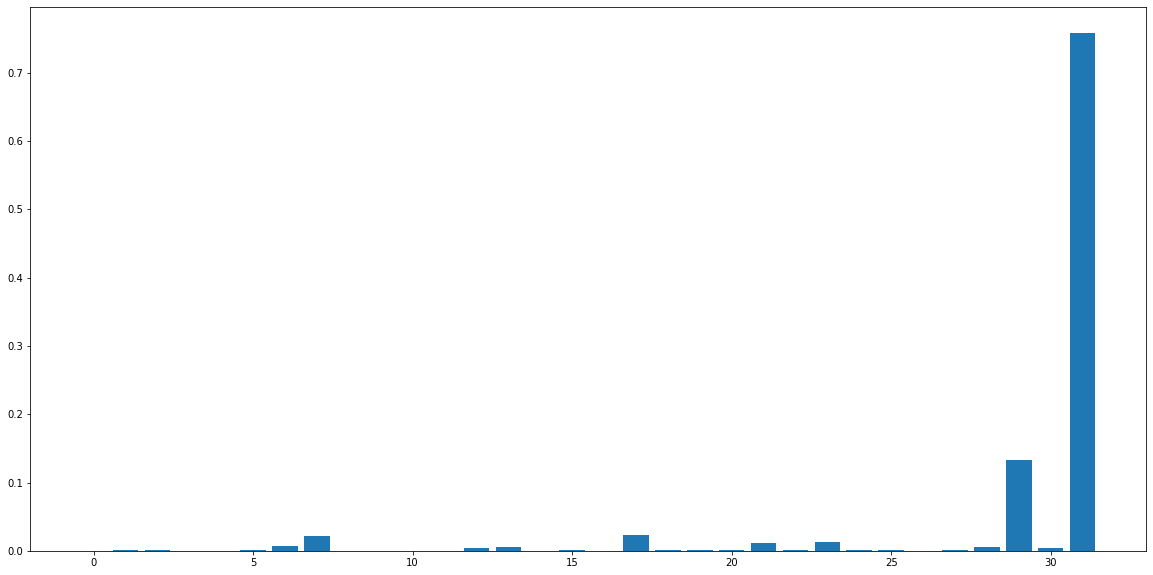

In [45]:
X_train_m = student_math_encoded.drop(['G3'], axis=1)
y_train_m = student_math_encoded['G3']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X_train_m, y_train_m)
importance_mat = model.feature_importances_

# get importance
features=pd.DataFrame(({'Feature_names':student_math_encoded.drop('G3', axis =1).columns,'Importances':importance_mat}))
print((features.sort_values(by='Importances',ascending=False).head(10)))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance_mat))], importance_mat)
plt.show()

# Feature selection for Math dataset using SelectKBest

In [46]:
# SelectKBest with f_regression selecting 3 features 
D = 3
est = SelectKBest(f_regression,k=D)
X_new = est.fit_transform(X_train_m, y_train_m)
sup = est.get_support()
featurenames = X_train_m.columns
print("Features selected are:")
for nn in np.where(sup)[0]:
  print(featurenames[nn])

Features selected are:
failures
G1
G2


# Math model with all features - DecisionTreeRegressor and LinearRegression

In [47]:
# Find the best parameters for DecisionTreeRegressor()
dtr = DecisionTreeRegressor()
gridSearch = GridSearchCV(dtr,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch.fit(X_train_m, y_train_m)
gridSearchParam = gridSearch.best_params_
max_d = gridSearchParam['max_depth']
min_s = gridSearchParam['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_all = DecisionTreeRegressor(max_depth=max_d, min_samples_split=min_s)
dtr_all = dtr_all.fit(X_train_m, y_train_m)

# Train linear regression for comparison
lin_all = LinearRegression()
lin_all = lin_all.fit(X_train_m, y_train_m)


# Testing the model on the Portuguese dataset

In [48]:
# Testing on Portuguese dataset
X_test_p = student_port_encoded.drop(['G3'], axis=1)
y_test_p = student_port_encoded['G3']

# Score & Predict values for Portuguese dataset decision tree regression
predicted_y_dtr = dtr_all.predict(X_test_p)
R2_math_all_dtr = dtr_all.score(X_test_p,y_test_p)
predicted_Table_dtr = pd.DataFrame({'Real Values ':y_test_p, 'Predicted Values ':predicted_y_dtr.reshape(-1)})
print("Decision tree regression score for Portuguese dataset: ", R2_math_all_dtr)

# Score & Predict values for Portuguese dataset linear regression
R2_math_all_lin = lin_all.score(X_test_p,y_test_p)
predicted_y_lin = lin_all.predict(X_test_p);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_p, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score for Portuguese dataset: ", R2_math_all_lin)


# Calculate root mean square error decision tree regression
mse_dtr = mean_squared_error(y_test_p, predicted_y_dtr)
rmse_math_allfeat_dtr = np.sqrt(mse_dtr)
print('\nRMSE for decision tree regression:',rmse_math_allfeat_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_p, predicted_y_lin)
rmse_math_allfeat_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_math_allfeat_lin)


# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))

Decision tree regression score for Portuguese dataset:  0.6802187699282434
Linear regression score for Portuguese dataset:  0.761496967823657

RMSE for decision tree regression: 1.8255023164676931
RMSE for linear regression: 1.5765322396959376

Decision tree regression table


Real Values   Predicted Values 
0            11          10.942857
1            11          10.942857
2            12          13.108108
3            14          14.130435
4            13          13.108108
5            13          11.926829
6            13          11.926829
7            13          13.108108
8            17          15.510638
9            13          11.926829


Linear regression table


Real Values   Predicted Values 
0            11           8.654682
1            11          10.363650
2            12          13.571436
3            14          13.195155
4            13          12.794382
5            13          12.678686
6            13          11.912606
7            13          12.594017
8            17          16.472937
9            13          12.017853

# Decision tree vizualization for Math dataset

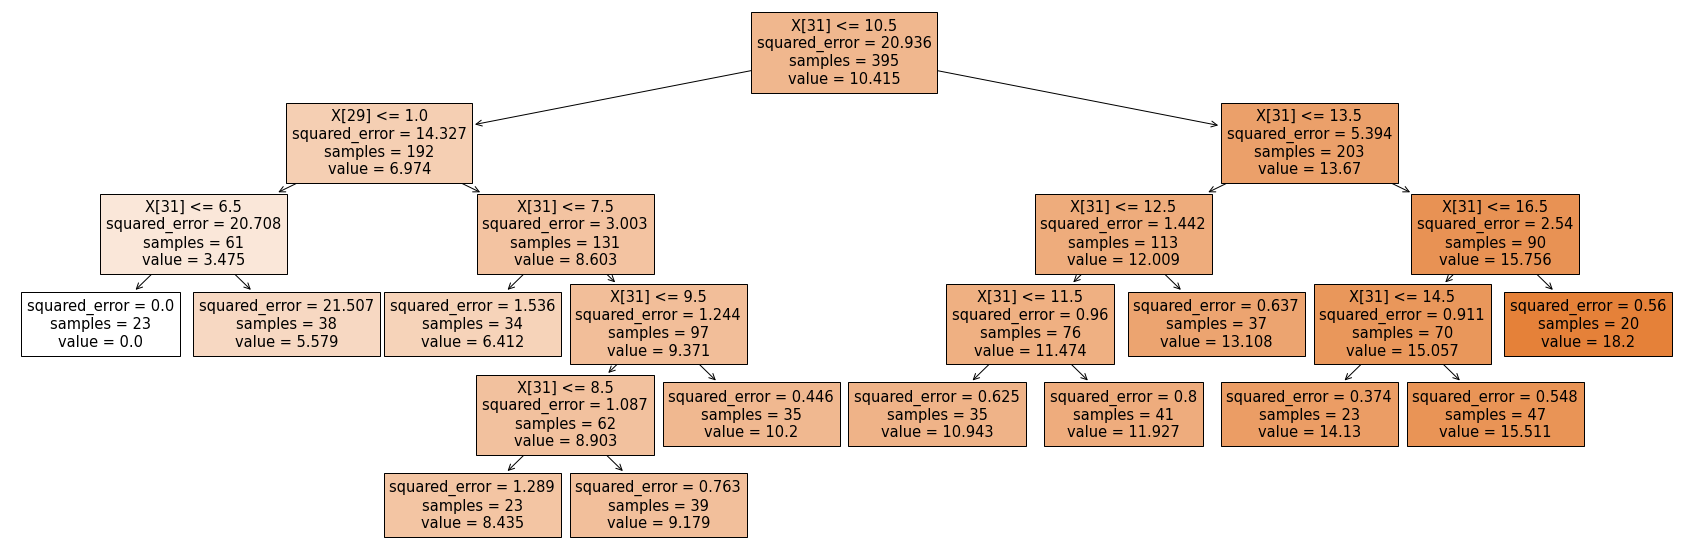

In [49]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtr_all, filled=True)
plt.show()

# Math model with features importance - DecisionTreeRegressor and LinearRegression

In [50]:
feature_importances_m=['G2','absences','age']

X_train_fi_m = student_math_encoded[feature_importances_m]
y_train_fi_m = student_math_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr = DecisionTreeRegressor()

gridSearch_fi = GridSearchCV(dtr,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_fi.fit(X_train_fi_m, y_train_fi_m)
gridSearchParam_fi = gridSearch_fi.best_params_

max_d_fi = gridSearchParam_fi['max_depth']
min_s_fi = gridSearchParam_fi['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor(max_depth=max_d_fi, min_samples_split=min_s_fi)
dtr_fi = dtr_fi.fit(X_train_fi_m, y_train_fi_m)

# Run linear regression for comparison
lin_fi = LinearRegression()
lin_fi = lin_fi.fit(X_train_fi_m, y_train_fi_m)


# Testing on Portugese dataset

In [51]:
# Testing on Portuguese dataset
X_test_p = student_port_encoded.drop(['G3'], axis=1)
X_test_fi_p = X_test_p[feature_importances_m]
y_test_fi_p = student_port_encoded['G3']

# Score & Predict values for feature importance on the Portuguese dataset decision tree regression
predicted_y_fi_dtr = dtr_fi.predict(X_test_fi_p)
R2_math_fi_dtr = dtr_fi.score(X_test_fi_p,y_test_fi_p)
predicted_Table_fi_dtr = pd.DataFrame({'Real Values ':y_test_fi_p, 'Predicted Values ':predicted_y_fi_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with _feature_importances_:\n", R2_math_fi_dtr)


# Score & Predict values for feature importance on the Portuguese dataset linear regression
R2_math_fi_lin = lin_fi.score(X_test_fi_p,y_test_fi_p)
predicted_y_lin = lin_fi.predict(X_test_fi_p);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_fi_p, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score with 3 features chosen with _feature_importances_:\n", R2_math_fi_lin)


# Calculate root mean square error decision tree regression
mse2_dtr = mean_squared_error(y_test_fi_p, predicted_y_fi_dtr)
rmse_math_fi_dtr = np.sqrt(mse2_dtr)
print('\nRMSE for _feature_importances_:',rmse_math_fi_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_fi_p, predicted_y_lin)
rmse_math_fi_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_math_fi_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))


Decision tree regression score with 3 features chosen with _feature_importances_:
 0.6765339183350056
Linear regression score with 3 features chosen with _feature_importances_:
 0.7969301735030223

RMSE for _feature_importances_: 1.8359898581311
RMSE for linear regression: 1.4547172974676756

Decision tree regression table


Real Values   Predicted Values 
0            11          10.942857
1            11          10.942857
2            12          13.108108
3            14          14.130435
4            13          13.108108
5            13          11.926829
6            13          11.926829
7            13          13.108108
8            17          15.510638
9            13          11.926829


Linear regression table


Real Values   Predicted Values 
0            11          10.450405
1            11          10.530094
2            12          13.207354
3            14          14.061517
4            13          12.803843
5            13          11.949680
6            13          11.706812
7            13          12.724154
8            17          16.255577
9            13          11.867457

# Math model with SelectKBest (SKB) - DecisionTreeRegressor and LinearRegression

In [52]:
SelectKBest_m=['G1','G2','failures']
X_train_SKB_m = student_math_encoded[SelectKBest_m]
y_train_SKB_m = student_math_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_find = DecisionTreeRegressor()

gridSearch_SKB_m = GridSearchCV(dtr_find,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)

gridSearchParam_SKB_m = gridSearch_SKB_m.best_params_

max_d_SKB_m = gridSearchParam_SKB_m['max_depth']
min_s_SKB_m = gridSearchParam_SKB_m['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_SKB_m = DecisionTreeRegressor(max_depth=max_d_SKB_m, min_samples_split=min_s_SKB_m)
dtr_SKB_m = dtr_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)

# Linear Regression
lin_SKB_m = LinearRegression()
lin_SKB_m = lin_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)


# Testing on Portugese dataset

In [53]:
# Testing on Portuguese dataset
X_p = student_port_encoded.drop(['G3'], axis=1)
X_test_SKB_p = X_p[SelectKBest_m]
y_test_SKB_p = student_port_encoded['G3']

# Score & Predict values for Select K best on the Portuguese dataset decision tree regression 
predicted_y_SKB_dtr = dtr_SKB_m.predict(X_test_SKB_p)
R2_math_SKB_dtr = dtr_SKB_m.score(X_test_SKB_p,y_test_SKB_p)
predicted_Table_SKB_dtr = pd.DataFrame({'Real Values ':y_test_SKB_p, 'Predicted Values ':predicted_y_SKB_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with SelectKBest:\n",R2_math_SKB_dtr)


# Score & Predict values for Select K best on the Portuguese dataset linear regression 
predicted_y_SKB_lin = lin_SKB_m.predict(X_test_SKB_p);
R2_math_SKB_lin = lin_SKB_m.score(X_test_SKB_p,y_test_SKB_p)
predicted_Table_SKB_lin = pd.DataFrame({'Real Values ':y_test_SKB_p, 'Predicted Values ':predicted_y_SKB_lin.reshape(-1)})
print("Linear regression score for with 3 features chosen with SelectKBest:\n ", R2_math_SKB_lin)


# Calculate root mean square error for SelectKBest decision tree regression
mse3_dtr = mean_squared_error(y_test_SKB_p, predicted_y_SKB_dtr)
rmse_math_SKB_dtr = np.sqrt(mse3_dtr)
print('\nRMSE for decision tree regression SelectKBest:',rmse_math_SKB_dtr)


# Calculate root mean square error for SelectKBest linear regression
mse3_lin = mean_squared_error(y_test_SKB_p, predicted_y_SKB_lin)
rmse_math_SKB_lin = np.sqrt(mse3_lin)
print('RMSE for linear regression SelectKBest:',rmse_math_SKB_lin)

# Display the result
print('\nDecision tree regression table predicted values with 3 features chosen with SelectKBest:')
display(predicted_Table_SKB_dtr.head(10))

print("\nLinear regression table predicted values with 3 features chosen with SelectKBest:")
display(predicted_Table_SKB_lin.head(10))

Decision tree regression score with 3 features chosen with SelectKBest:
 0.749916388938118
Linear regression score for with 3 features chosen with SelectKBest:
  0.8119456063196027

RMSE for decision tree regression SelectKBest: 1.6143530548326988
RMSE for linear regression SelectKBest: 1.399902039815959

Decision tree regression table predicted values with 3 features chosen with SelectKBest:


Real Values   Predicted Values 
0            11          11.333333
1            11          11.333333
2            12          12.894737
3            14          14.000000
4            13          13.222222
5            13          11.916667
6            13          12.000000
7            13          13.222222
8            17          16.076923
9            13          11.916667


Linear regression table predicted values with 3 features chosen with SelectKBest:


Real Values   Predicted Values 
0            11           9.207777
1            11          10.498939
2            12          12.885020
3            14          14.149792
4            13          12.741558
5            13          11.907173
6            13          12.050636
7            13          12.598095
8            17          16.248948
9            13          11.907173

# Feature selection for Portuguese dataset using feature_importances_

   Feature_names  Importances
31            G2     0.841387
29      absences     0.021941
23        famrel     0.019170
7         reason     0.016156
25         goout     0.014632
26          Dalc     0.012594
1            sex     0.012150
6           Fjob     0.011536
30            G1     0.007916
27          Walc     0.005392


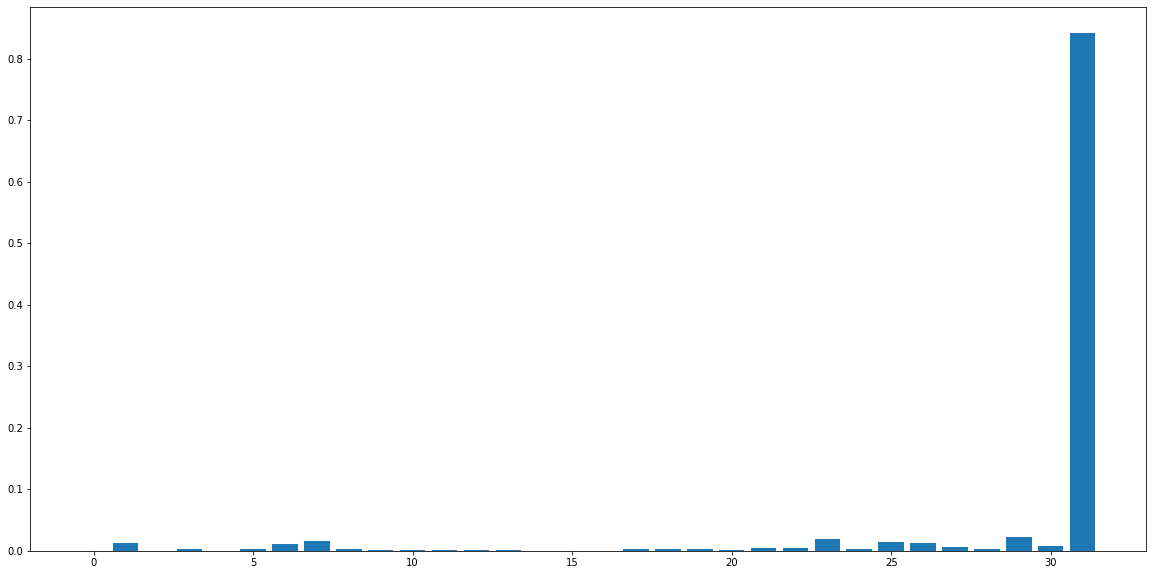

In [54]:
X_train_p = student_port_encoded.drop(['G3'], axis=1)
y_train_p = student_port_encoded['G3']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X_train_p, y_train_p)
importance_por = model.feature_importances_

# get importance
features=pd.DataFrame(({'Feature_names':student_port_encoded.drop('G3', axis =1).columns,'Importances':importance_por}))
print((features.sort_values(by='Importances',ascending=False).head(10)))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance_por))], importance_por)
plt.show()

# Feature selection for Portuguese dataset using SelectKBest

In [55]:
# SelectKBest with f_regression selecting 10 features 
D = 3
est = SelectKBest(f_regression,k=D)
X_new = est.fit_transform(X_train_p, y_train_p)
sup = est.get_support()
featurenames = X_train_p.columns

print("Features selected are:")
for nn in np.where(sup)[0]:
  print(featurenames[nn])

Features selected are:
failures
G1
G2


# Portuguese model with all features using DecisionTreeRegressor and LinearRegression

In [56]:
# Find the best parameters for DecisionTreeRegressor()
dtr_ = DecisionTreeRegressor()
gridSearch = GridSearchCV(dtr_,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch.fit(X_train_p, y_train_p)
gridSearchParam = gridSearch.best_params_
max_d = gridSearchParam['max_depth']
min_s = gridSearchParam['min_samples_split']

# Use the best parameters for DecisionTreeRegressor() and train it
dtr_p = DecisionTreeRegressor(max_depth=max_d, min_samples_split=min_s)
dtr_p = dtr_p.fit(X_train_p, y_train_p)

# Train linear regression for comparison
lin_p = LinearRegression()
lin_p = lin_p.fit(X_train_p, y_train_p)


# Testing the model on the math dataset

In [57]:
# Testing on math dataset
X_test_m = student_math_encoded.drop(['G3'], axis=1)
y_test_m = student_math_encoded['G3']

# Score & Predict values for math dataset decision tree regression
predicted_y_dtr = dtr_p.predict(X_test_m)
R2_port_all_dtr = dtr_p.score(X_test_m,y_test_m)
predicted_Table_dtr = pd.DataFrame({'Real Values ':y_test_m, 'Predicted Values ':predicted_y_dtr.reshape(-1)})
print("Decision tree regression score for math dataset: ", R2_port_all_dtr)

# Score & Predict values for math dataset linear regression
R2_port_all_lin = lin_p.score(X_test_m,y_test_m)
predicted_y_lin = lin_p.predict(X_test_m);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_m, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score for Portuguese dataset: ", R2_port_all_lin)


# Calculate root mean square error decision tree regression
mse_dtr = mean_squared_error(y_test_m, predicted_y_dtr)
rmse_port_allfeat_dtr = np.sqrt(mse_dtr)
print('\nRMSE for decision tree regression:',rmse_port_allfeat_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_m, predicted_y_lin)
rmse_port_allfeat_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_port_allfeat_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))


Decision tree regression score for math dataset:  0.7881661829115212
Linear regression score for Portuguese dataset:  0.7895681937602878

RMSE for decision tree regression: 2.1059568082823246
RMSE for linear regression: 2.098976157291823

Decision tree regression table


Real Values   Predicted Values 
0             6           8.063830
1             6           8.063830
2            10           8.063830
3            15          14.666667
4            10          10.217391
5            15          15.500000
6            11          13.012658
7             6           8.063830
8            19          17.485714
9            15          15.500000


Linear regression table


Real Values   Predicted Values 
0             6           6.217091
1             6           5.786068
2            10           7.219881
3            15          14.329361
4            10           9.706948
5            15          15.176757
6            11          12.371742
7             6           5.720690
8            19          18.316118
9            15          15.077859

# Decision tree vizualization for Portuguese data

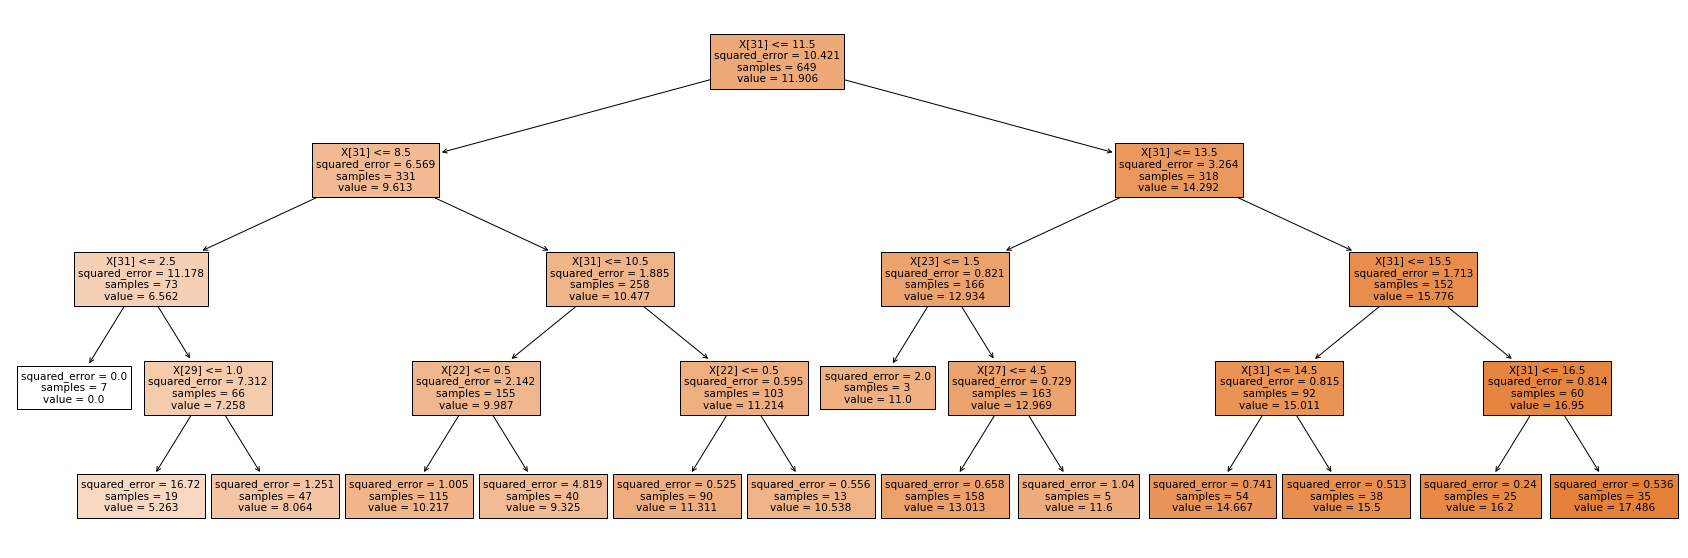

In [58]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtr_p, filled=True)
plt.show()

# Portugese model with feature importance using DecisionTreeRegressor and LinearRegression

In [59]:
# Lists of the selected features
feature_importances_p=['G2','famrel','absences']

X_train_fi_p = student_port_encoded[feature_importances_p]
y_train_fi_p = student_port_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor()

gridSearch_fi = GridSearchCV(dtr_fi,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_fi.fit(X_train_fi_p, y_train_fi_p)

gridSearchParam_fi = gridSearch_fi.best_params_

max_d_fi = gridSearchParam_fi['max_depth']
min_s_fi = gridSearchParam_fi['min_samples_split']


# Train with the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor(max_depth=max_d_fi, min_samples_split=min_s_fi)
dtr_fi = dtr_fi.fit(X_train_fi_p, y_train_fi_p)

# Train linear regression for comparison
lin_fi = LinearRegression()
lin_fi = lin_fi.fit(X_train_fi_p, y_train_fi_p)

# Testing the model on the math dataset with feature importance

In [60]:
# Testing on math dataset
X_m = student_math_encoded.drop(['G3'], axis=1)
X_test_fi_m = X_m[feature_importances_p]
y_test_fi_m = student_math_encoded['G3']

# Score & Predict values for feature importance on the math dataset decision tree regression
predicted_y_fi_dtr = dtr_fi.predict(X_test_fi_m)
R2_port_fi_dtr = dtr_fi.score(X_test_fi_m,y_test_fi_m)
predicted_Table_fi_dtr = pd.DataFrame({'Real Values ':y_test_fi_m, 'Predicted Values ':predicted_y_fi_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with _feature_importances_:\n", R2_port_fi_dtr)


# Score & Predict values for feature importance on the math dataset linear regression
R2_port_fi_lin = lin_fi.score(X_test_fi_m,y_test_fi_m)
predicted_y_lin = lin_fi.predict(X_test_fi_m);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_fi_m, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score with 3 features chosen with _feature_importances_:\n", R2_port_fi_lin)


# Calculate root mean square error decision tree regression
mse2_dtr = mean_squared_error(y_test_fi_m, predicted_y_fi_dtr)
rmse_port_fi_dtr = np.sqrt(mse2_dtr)
print('\nRMSE for _feature_importances_:',rmse_port_fi_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_fi_m, predicted_y_lin)
rmse_port_fi_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_port_fi_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))

Decision tree regression score with 3 features chosen with _feature_importances_:
 0.7973192655827235
Linear regression score with 3 features chosen with _feature_importances_:
 0.7955637281664912

RMSE for _feature_importances_: 2.059956495462137
RMSE for linear regression: 2.068858509883015

Decision tree regression table


Real Values   Predicted Values 
0             6           8.063830
1             6           8.063830
2            10           8.063830
3            15          14.666667
4            10          10.217391
5            15          15.500000
6            11          13.012658
7             6           8.063830
8            19          17.485714
9            15          15.500000


Linear regression table


Real Values   Predicted Values 
0             6           6.238319
1             6           5.125559
2            10           8.346679
3            15          14.421353
4            10          10.300546
5            15          15.451069
6            11          12.285312
7             6           5.215038
8            19          18.425000
9            15          15.296576

# Portugese model with SelectKBest (SKB) using DecisionTreeRegressor and LinearRegression

In [61]:
SelectKBest_p=['G1','G2','failures']
X_train_SKB_p = student_port_encoded[SelectKBest_p]
y_train_SKB_p = student_port_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_SKB = DecisionTreeRegressor()

gridSearch_SKB = GridSearchCV(dtr_SKB,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_SKB.fit(X_train_SKB_p, y_train_SKB_p)
gridSearchParam_SKB = gridSearch_SKB.best_params_

max_d_SKB = gridSearchParam_SKB['max_depth']
min_s_SKB = gridSearchParam_SKB['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_SKB = DecisionTreeRegressor(max_depth=max_d_SKB, min_samples_split=min_s_SKB)
dtr_SKB = dtr_SKB.fit(X_train_SKB_p, y_train_SKB_p)

# Run linear regression for comparison
lin_SKB = LinearRegression()
lin_SKB = lin_SKB.fit(X_train_SKB_p, y_train_SKB_p)


# Testing on math dataset SelectKBest (SKB)

In [62]:
# Testing on math dataset
X_m = student_math_encoded.drop(['G3'], axis=1)
X_test_SKB_m = X_m[SelectKBest_p]
y_test_SKB_m = student_math_encoded['G3']


# Score & Predict values for Select K best on the  math dataset decision tree regression 
predicted_y_SKB_dtr = dtr_SKB.predict(X_test_SKB_m)
R2_port_SKB_dtr = dtr_SKB.score(X_test_SKB_m,y_test_SKB_m)
predicted_Table_SKB_dtr = pd.DataFrame({'Real Values ':y_test_SKB_m, 'Predicted Values ':predicted_y_SKB_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with SelectKBest:\n",R2_port_SKB_dtr)


# Score & Predict values for Select K best on the Portuguese dataset linear regression 
predicted_y_SKB_lin = lin_SKB.predict(X_test_SKB_m);
R2_port_SKB_lin = lin_SKB.score(X_test_SKB_m,y_test_SKB_m)
predicted_Table_SKB_lin = pd.DataFrame({'Real Values ':y_test_SKB_m, 'Predicted Values ':predicted_y_SKB_lin.reshape(-1)})
print("Linear regression score for with 3 features chosen with SelectKBest:\n ", R2_port_SKB_lin)


# Calculate root mean square error for SelectKBest decision tree regression
mse3_dtr = mean_squared_error(y_test_SKB_m, predicted_y_SKB_dtr)
rmse_port_SKB_dtr = np.sqrt(mse3_dtr)
print('\nRMSE for decision tree regression SelectKBest:',rmse_port_SKB_dtr)


# Calculate root mean square error for SelectKBest linear regression
mse3_lin = mean_squared_error(y_test_SKB_m, predicted_y_SKB_lin)
rmse_port_SKB_lin = np.sqrt(mse3_lin)
print('RMSE for linear regression SelectKBest:',rmse_port_SKB_lin)

# Display the result
print('\nDecision tree regression table predicted values with 3 features chosen with SelectKBest:')
display(predicted_Table_SKB_dtr.head(10))

print("\nLinear regression table predicted values with 3 features chosen with SelectKBest:")
display(predicted_Table_SKB_lin.head(10))

Decision tree regression score with 3 features chosen with SelectKBest:
 0.7823123213193777
Linear regression score for with 3 features chosen with SelectKBest:
  0.7979461564731654

RMSE for decision tree regression SelectKBest: 2.134856745437942
RMSE for linear regression SelectKBest: 2.0567683087260833

Decision tree regression table predicted values with 3 features chosen with SelectKBest:


Real Values   Predicted Values 
0             6           5.913043
1             6           5.913043
2            10           7.423077
3            15          15.333333
4            10          10.083333
5            15          15.437500
6            11          12.760000
7             6           5.913043
8            19          17.678571
9            15          15.631579


Linear regression table predicted values with 3 features chosen with SelectKBest:


Real Values   Predicted Values 
0             6           6.112079
1             6           5.224051
2            10           7.535067
3            15          14.613855
4            10           9.803945
5            15          15.501883
6            11          12.418533
7             6           5.363807
8            19          18.305721
9            15          15.362127

# Comparison between R2 scores from Decision Tree Regressor

In [63]:
score_all = {"Math score all features": R2_math_all_dtr,"Portugese score all features": R2_port_all_dtr, "Math feature importance": R2_math_fi_dtr, "Math SelectKBest": R2_math_SKB_dtr, "Portugese feature importance": R2_port_fi_dtr, "Portugese SelectKBest": R2_port_SKB_dtr}

numpyArray = np.array([[R2_math_all_dtr,R2_port_all_dtr], [R2_math_fi_dtr,R2_port_fi_dtr], [R2_math_SKB_dtr,R2_port_SKB_dtr]])

R2_table_dtr = pd.DataFrame(data = numpyArray, 
                        index = ["Score all features", "Feature importance", "SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
R2_table_dtr.head()

Training math, testing port  Training port, testing math
Score all features                     0.680219                     0.788166
Feature importance                     0.676534                     0.797319
SelectKBest                            0.749916                     0.782312

# Comparison between R2 scores from Linear Regression

In [64]:
score_all = {"Math score all features": R2_math_all_lin,"Portugese score all features": R2_port_all_lin, "Math feature importance": R2_math_fi_lin, "Math SelectKBest": R2_math_SKB_lin, "Portugese feature importance": R2_port_fi_lin, "Portugese SelectKBest": R2_port_SKB_lin}

numpyArray = np.array([[R2_math_all_lin,R2_port_all_lin], [R2_math_fi_lin,R2_port_fi_lin], [R2_math_SKB_lin,R2_port_SKB_lin]])

R2_table_lin = pd.DataFrame(data = numpyArray, 
                        index = ["Score all features", "Feature importance", "SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])

R2_table_lin.head()


Training math, testing port  Training port, testing math
Score all features                     0.761497                     0.789568
Feature importance                     0.796930                     0.795564
SelectKBest                            0.811946                     0.797946

# Comparison between RMSE from Decision Tree Regressor

In [65]:
rmse_all = {"rmse math score all features": rmse_math_allfeat_dtr,
            "rmse portugese score all features": rmse_port_allfeat_dtr, 
            "rmse math feature importance": rmse_math_fi_dtr, 
            "rmse math SelectKBest": rmse_math_SKB_dtr, 
            "rmse portugese feature importance": rmse_port_fi_dtr, 
            "rmse portugese SelectKBest":  rmse_port_SKB_dtr}

numpyArray = np.array([[rmse_math_allfeat_dtr,rmse_port_allfeat_dtr], [rmse_math_fi_dtr,rmse_port_fi_dtr], [rmse_math_SKB_dtr,rmse_port_SKB_dtr]])

rmse_table_dtr = pd.DataFrame(data = numpyArray, 
                        index = ["RMSE all features", "RMSE feature importance", "RMSE SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
rmse_table_dtr.head()

Training math, testing port  \
RMSE all features                           1.825502   
RMSE feature importance                     1.835990   
RMSE SelectKBest                            1.614353   

                         Training port, testing math  
RMSE all features                           2.105957  
RMSE feature importance                     2.059956  
RMSE SelectKBest                            2.134857

# Comparison between RMSE from Linear Regression

In [66]:
rmse_all = {"rmse math score all features": rmse_math_allfeat_lin,
            "rmse portugese score all features": rmse_port_allfeat_lin, 
            "rmse math feature importance": rmse_math_fi_lin, 
            "rmse math SelectKBest": rmse_math_SKB_lin, 
            "rmse portugese feature importance": rmse_port_fi_lin, 
            "rmse portugese SelectKBest":  rmse_port_SKB_lin}

numpyArray = np.array([[rmse_math_allfeat_lin,rmse_port_allfeat_lin], [rmse_math_fi_lin,rmse_port_fi_lin], [rmse_math_SKB_lin,rmse_port_SKB_lin]])

rmse_table_lin = pd.DataFrame(data = numpyArray, 
                        index = ["RMSE all features", "RMSE feature importance", "RMSE SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
rmse_table_lin.head()

Training math, testing port  \
RMSE all features                           1.576532   
RMSE feature importance                     1.454717   
RMSE SelectKBest                            1.399902   

                         Training port, testing math  
RMSE all features                           2.098976  
RMSE feature importance                     2.068859  
RMSE SelectKBest                            2.056768